## Linear Classifier 실습 01

iris 데이터 셋에 선형분류 적용

In [7]:
from sklearn.datasets import load_iris

In [1]:
iris = load_iris()

print(type(iris))
print(iris.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
X, y = iris.data, iris.target

X.shape, y.shape

X2 = X[:, :2]
X2[:5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline 

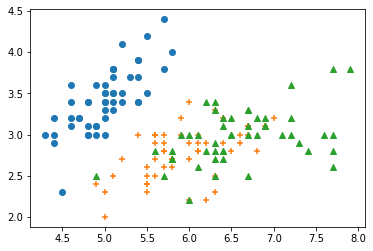

In [15]:
plt.scatter(X2[:, 0][y == 0], X2[:, 1][y == 0], marker='o')
plt.scatter(X2[:, 0][y == 1], X2[:, 1][y == 1], marker='+')
plt.scatter(X2[:, 0][y == 2], X2[:, 1][y == 2], marker='^')

plt.show()

In [16]:
y2 = y.copy()

In [19]:
y2[(y == 2)] = 1
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.5)

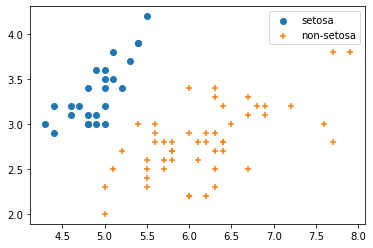

In [25]:
markers = ['o', '+', '^']
for i in range(3):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]

    plt.scatter(xs, ys, marker=markers[i])

plt.legend(['setosa', 'non-setosa'])
plt.show()

In [29]:
from sklearn.linear_model import SGDClassifier
import numpy as np

In [27]:
model = SGDClassifier()

model.fit(X_train, y_train)

model.coef_, model.intercept_

(array([[ 26.24671916, -41.99475066]]), array([-9.89162165]))

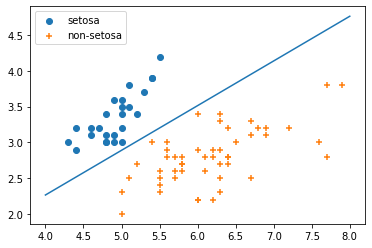

In [35]:
markers = ['o', '+', '^']
for i in range(3):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]

    plt.scatter(xs, ys, marker=markers[i])

plt.legend(['setosa', 'non-setosa'])

# 직선 그리기
# xx = np.linspace(4, 8, 10)
# y_pred = model.predict(xx[:, None])

a = model.coef_[0, 0]
b = model.coef_[0, 1]
c = model.intercept_

yy = (-a/b) * xx - c/b
plt.plot(xx, yy)
plt.show()

In [36]:
model.score(X_train, y_train)

1.0

In [37]:
model.score(X_test, y_test)

0.9866666666666667